In [25]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [26]:
# Declare global variables for image and label
global train_images
global train_labels
global test_images
global test_labels

# Load train/test dataset
train_images = np.load('.\\archive\\X_train.npy')
train_labels = np.load('.\\archive\y_train.npy')
test_images = np.load('.\\archive\\X_test.npy')
test_labels = np.load('.\\archive\\y_test.npy')

In [27]:
def calculate_color_image_sharpness(image):
    # Split the image into its channel components
    channels = cv2.split(image)
    
    # Apply the Laplacian operator to each channel
    laplacian_channels = [cv2.Laplacian(channel, cv2.CV_64F) for channel in channels]
    
    # Calculate the variance of the Laplacian for each channel and sum them
    sharpness = sum(np.var(laplacian) for laplacian in laplacian_channels)
    
    return sharpness

In [28]:
def filter_blurry_color_images(images_array, sharpness_threshold):
    # Initialize a list to hold indices of non-blurry images
    sharp_images_indices = []

    # Iterate over each image in the dataset
    for i in range(images_array.shape[3]):
        image_i = images_array[:, :, :, i]     
        
        # Calculate the sharpness of the current image
        sharpness = calculate_color_image_sharpness(image_i)
        
        # If the sharpness is above the threshold, it's not considered blurry
        if sharpness < sharpness_threshold:
            sharp_images_indices.append(i)
    
    return sharp_images_indices

In [29]:
sharpness_threshold = 0.015 
blurry_images_ind = filter_blurry_color_images(train_images, sharpness_threshold)

train_images = np.delete(train_images,blurry_images_ind, axis=3)
print('sharp_images:' , train_images.shape[3])
train_images = np.transpose(train_images, (3, 0, 1, 2))

sharp_images: 22888


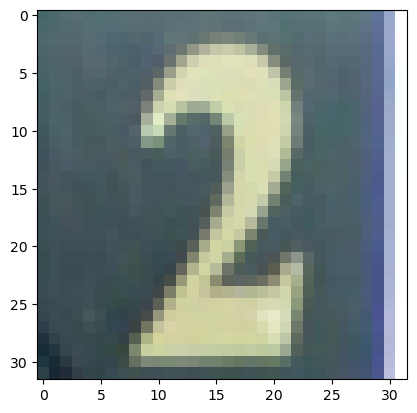

In [38]:
plt.imshow(train_images[13])
plt.show()